# Homework 1 - Principal Component Analysis

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#DATA READING

dataframe = np.genfromtxt("Frogs_MFCCs.csv", delimiter=',', dtype='object', skip_header=1)
data = np.array(dataframe[:,:-4], dtype='float')
families=dataframe[:,-4].astype('U13')

In [3]:
# NORMALIZATION

for i in range(data.shape[1]):
    data[:,i]=(data[:,i]-data[:,i].mean())/data[:,i].std()

In [4]:
# COMPUTATION OF COVARIANCE MATRIX

cov=data.T@data/data.shape[0]

In [5]:
# DIAGONALIZATION

eigenvalues, eigenvectors=np.linalg.eig(cov)
sorted_indices = np.argsort(-eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:,sorted_indices]

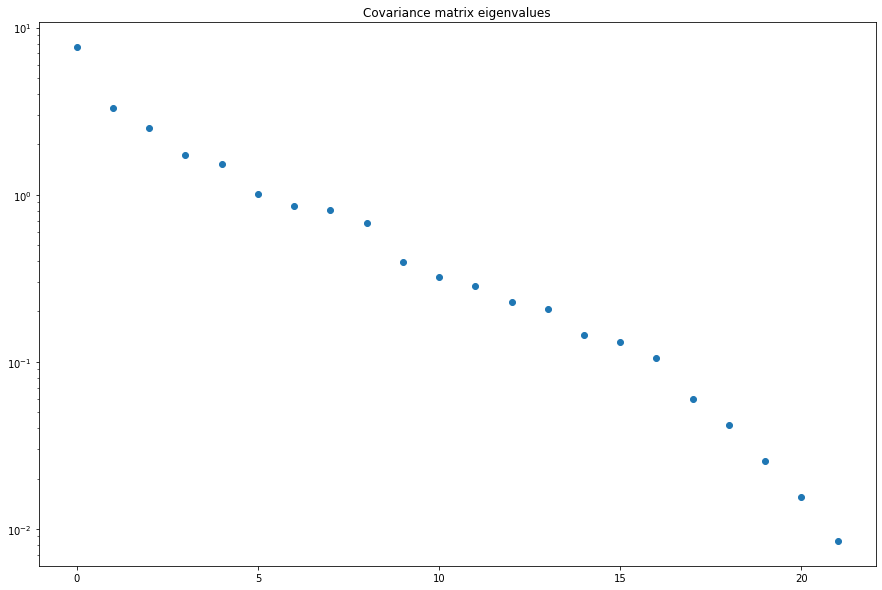

In [6]:
plt.figure(figsize=(15,10))
plt.title("Covariance matrix eigenvalues")
plt.semilogy(eigenvalues, 'o')

In [7]:
#COMPUTATION OF FIRST TWO PRINCIPAL COMPONENTS

pc1=data@eigenvectors[:,0]
pc2=data@eigenvectors[:,1]

<AxesSubplot:title={'center':'Projection on PC1 and PC2'}>

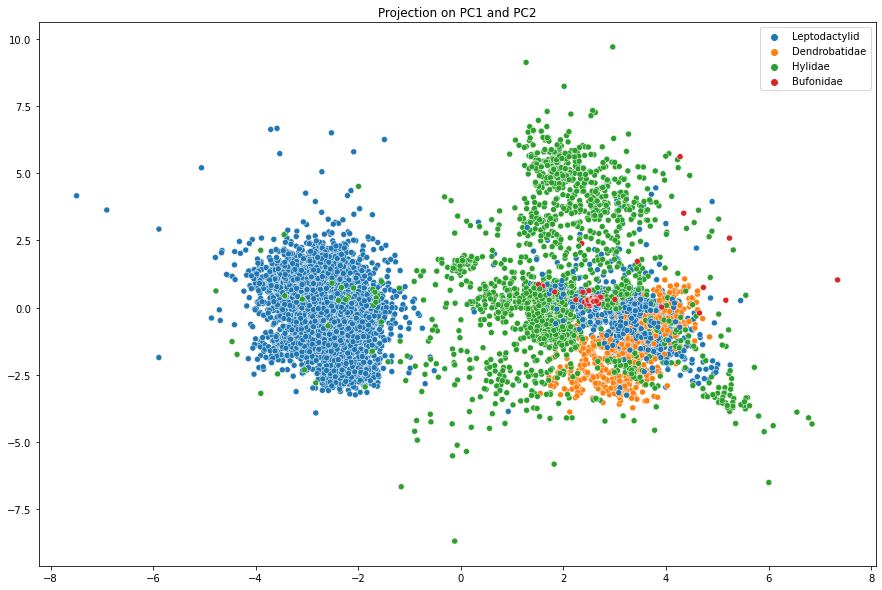

In [8]:
plt.figure(figsize=(15,10))
plt.title("Projection on PC1 and PC2")
sns.scatterplot(x=pc1,y=pc2, hue=families)